### **State Reducers**

##### **Review**

We covered a few different ways to define LangGraph state schema, including `TypedDict`, `Pydantic`, or `Dataclasses`.

##### **Goals**

Now, we're going to dive into reducers, which specify how state updates are performed on specific keys/channels in the state schema.

##### **Default overwriting state**

Let's use a `TypedDict` as our state schema.

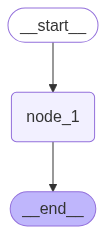

In [2]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    foo: int


def node_1(state):
    print("--Node 1--")
    return {"foo": state['foo'] + 1}


# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", END)

# Compile
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [3]:
graph.invoke({"foo": 1})

--Node 1--


{'foo': 2}

Let's look at the state update, `return {"foo": state['foo'] + 1}`.

As discussed before, by default LangGraph doesn't know the preferred way to update the state.

So, it will just overwrite the value of `foo` in `node_1`:

    return {"foo": state['foo'] + 1}

If we pass `{'foo': 1}` as input, the state returned from the graph is `{'foo': 2}`.

##### **Branching**

Let's look at a case where our nodes branch.